CISC 452 Project - Fake News Classification

[Project Document](https://docs.google.com/document/d/1Tv7F2FekBnIWUG2trPklvoZFMEhunhSry0VbfdoP_jI/edit?tab=t.0)

[Dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification?resource=download)

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load & View Dataset

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
# remove first column

df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
# count number of missing values from dataframe

df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [5]:
# fill null values with space

df.fillna(' ', inplace=True)
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

Distribution of Fake vs Real News

In [6]:
# Label 1 = Fake-News, Label 0 = Real-News

label = df['label'].value_counts()
print(label)

label
1    37106
0    35028
Name: count, dtype: int64


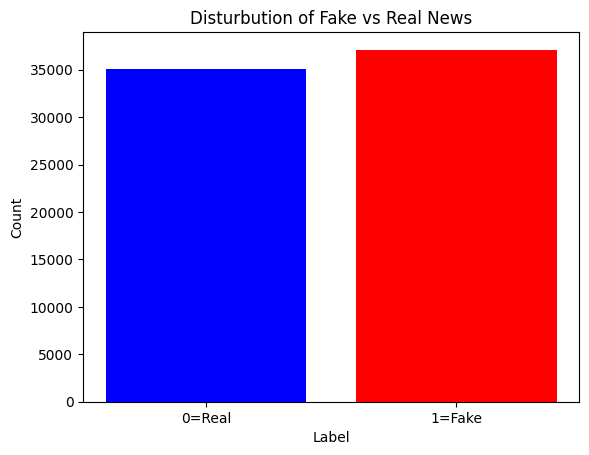

In [7]:
# Plot Distribution of Data

plt.bar(label.index, label.values, color=['red','blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Disturbution of Fake vs Real News')
plt.xticks([0, 1], ["0=Real", "1=Fake"])
plt.show()


Data Preprocessing

In [ ]:
# Clean Text
 
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def clean(text):
    
    clean_text = str(text)
    
    clean_text = re.sub(r'[^a-zA-Z\s]','',clean_text) # Remove punctuation, numbers, special characters
    
    clean_text = clean_text.lower()  # Convert text to lowercase

    tokens = clean_text.split() # Perform tokenization on text
    
    lemmatize_tokens = [stemmer.stem(word) for word in tokens] # perform stemming on the tokens
    
    stop_words = set(stopwords.words('english')) # Get stopwords
    clean_text = [word for word in lemmatize_tokens if word not in stop_words] # remove stopwords from list of words
    
    
    return " ".join(clean_text) # Join list of words back into a string

df['title'] = df['title'].apply(clean) # Apply clean function to title column

df.head()


,title,text,label
0,law enforc high alert follow threat cop white ...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,unbeliev obama attorney gener say charlott rio...,"Now, most of the demonstrators gathered last ...",1
3,bobbi jindal rai hindu use stori christian con...,A dozen politically active pastors came here f...,0
4,satan russia unv imag terrifi new supernuk wes...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
# Drop Text Column

df.drop(columns=['text'], inplace=True, axis=1)

df.head()

,title,label
0,law enforc high alert follow threat cop white ...,1
1,,1
2,unbeliev obama attorney gener say charlott rio...,1
3,bobbi jindal rai hindu use stori christian con...,0
4,satan russia unv imag terrifi new supernuk wes...,1


In [ ]:
# Define Feature and Target Variables

X = df['title'].values  # Feature
y = df['label'].values  # Target

Perform TF-IDF Vectorization on Dataset

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer Object
vectorizer = TfidfVectorizer()

# Fit and Transform Data
X = vectorizer.fit_transform(X)

print(X)

  (0, 23672)	0.1298856725356679
  (0, 21846)	0.24807949983741043
  (0, 8651)	0.4829269651769182
  (0, 2371)	0.3335359080112042
  (0, 24306)	0.19120636187649795
  (0, 4675)	0.25168565360198175
  (0, 22003)	0.25352235062479594
  (0, 8240)	0.2885916804200784
  (0, 506)	0.31730687314400363
  (0, 10081)	0.2738111480602588
  (0, 6946)	0.3177168148047847
  (0, 12355)	0.23034141165066577
  (2, 3434)	0.28066953262600147
  (2, 15078)	0.20307222300586106
  (2, 20887)	0.18301808114174997
  (2, 10319)	0.24670641175737698
  (2, 17422)	0.45752472344744827
  (2, 16239)	0.25402426311626203
  (2, 18644)	0.33019041068692767
  (2, 3727)	0.3310112331558339
  (2, 19256)	0.1466791694607408
  (2, 8832)	0.24209532332049763
  (2, 1474)	0.25872801761400843
  (2, 15265)	0.15490456622588997
  (2, 22955)	0.3270665750037422
  :	:
  (72130, 5611)	0.26568364194299926
  (72130, 24084)	0.25345463361289383
  (72130, 22524)	0.13448632817804881
  (72131, 10566)	0.46154893824584514
  (72131, 3281)	0.3957449997687884
  (7213

Split Dataset into Train & Test 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

Create the Model